# Spotify Data Analysis

Music is an incredibly important aspect of my life. Very few days go by where I don't jam out to several songs. I've always been curious to examine the trends within my music data. I'm finally enabled to do so. So, here it is. 

I'll be breaking down my analysis and be showing the code that goes along with it. 

To start we need data. One can download their spotify data using this [link](https://www.spotify.com/ca-en/account/privacy/). Just login and you can request a download of your listening data.  
  
The data comes in JSON format so the first step is to transform the data into a more usable form. To do this, we'll use the Pandas library.

In [1]:
import types
import pandas as pd

df_data = pd.read_json("one_year_streaming_history0.json")
print(df_data.dtypes)
df_data.head()

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object


,endTime,artistName,trackName,msPlayed
0,2019-01-05 05:32,Tonight Alive,World Away,0
1,2019-01-05 05:36,Eminem,Greatest,226937
2,2019-01-05 05:40,Elephante,Sirens,249411
3,2019-01-05 05:45,Mike Williams,Bambini,2972
4,2019-01-05 05:45,Panic! At The Disco,High Hopes,190946


If you notice the endTime column is listed as an __object__. Let's convert that to a _datetime_ so that it's easier to work with.

In [2]:
df_data['endTime'] = pd.to_datetime(df_data['endTime']) 
df_data.dtypes

endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed               int64
dtype: object

From there, I want to restructure the data so that that I can break each artist up into the amount of time I listened to them in a particular month.  

In [3]:
df_by_artist = df_data.groupby([df_data['endTime'].dt.month, df_data['artistName']]).sum().reset_index()
df_by_artist.rename(columns={'endTime': 'month'}, inplace=True)
df_by_artist

,month,artistName,msPlayed
0,1,12th Planet,205394
1,1,88GLAM,42992
2,1,ARTY,2786
3,1,Alec Benjamin,678654
4,1,Apashe,2225343
...,...,...,...
555,12,Thomas Rhett,223626
556,12,Westlife,12306
557,12,YBN Cordae,870076
558,12,YUNGBLUD,192068


Also that __endtime__ column is more of a _month_ than an __endtime__ so I changed it's name

The reason I want to structure it this way is because I tend to find new artists month to month and end up phasing out artists after a while. The plan is to look at what my top artists were for each month for the last year.

First thing I'm going to do is break my dataframe into a list of dataframes for each month that way I can easily sort the top values within each month.

In [4]:
list_dfs_month = [None] * 12

for i in range(len(list_dfs_month)):
    list_dfs_month[i] = df_by_artist[df_by_artist['month'] == i + 1].sort_values(by=['msPlayed'], ascending=False).reset_index()
    list_dfs_month[i].drop(['index', 'month'], axis=1, inplace=True)

print(list_dfs_month[0])
print(list_dfs_month[11])

artistName  msPlayed
0   Black Tiger Sex Machine  24633275
1             Ariana Grande  22492479
2              Virtual Riot   6290729
3                    Datsik   3839648
4      The Naked And Famous   2758170
..                      ...       ...
66                     ARTY      2786
67              Denis Kenzo      2101
68                   Trampa      1648
69                    Drake       997
70            Tonight Alive         0

[71 rows x 2 columns]
                 artistName  msPlayed
0          Carly Rae Jepsen  16212624
1                Dan + Shay  12627087
2                      3LAU   4274153
3                      Rhye   3664490
4                The Weeknd   3180911
5              Foo Fighters   1881991
6          The Chainsmokers   1859450
7                 Bad Bunny   1262202
8                    Halsey   1261587
9                      Kyan   1047865
10             Manila Killa    877984
11               YBN Cordae    870076
12               Luke Bryan    801613
13    

In [ ]:
print(list_dfs_month[10])

I'll also divide all the msPlayed values by 1000 to get them into seconds and replace the column name to be seconds.

In [5]:
for month_df in list_dfs_month:
    month_df['msPlayed'] = month_df['msPlayed'] / 1000
    month_df.rename(columns={'msPlayed' : 'secPlayed'}, inplace=True)

print(list_dfs_month[0])
print(list_dfs_month[11])

artistName  secPlayed
0   Black Tiger Sex Machine  24633.275
1             Ariana Grande  22492.479
2              Virtual Riot   6290.729
3                    Datsik   3839.648
4      The Naked And Famous   2758.170
..                      ...        ...
66                     ARTY      2.786
67              Denis Kenzo      2.101
68                   Trampa      1.648
69                    Drake      0.997
70            Tonight Alive      0.000

[71 rows x 2 columns]
                 artistName  secPlayed
0          Carly Rae Jepsen  16212.624
1                Dan + Shay  12627.087
2                      3LAU   4274.153
3                      Rhye   3664.490
4                The Weeknd   3180.911
5              Foo Fighters   1881.991
6          The Chainsmokers   1859.450
7                 Bad Bunny   1262.202
8                    Halsey   1261.587
9                      Kyan   1047.865
10             Manila Killa    877.984
11               YBN Cordae    870.076
12               Lu

In [6]:
for month_df in list_dfs_month:
    print(month_df.describe())

secPlayed
count     71.000000
mean    1263.357859
std     3954.195854
min        0.000000
25%       95.737000
50%      236.662000
75%      849.286500
max    24633.275000
          secPlayed
count     51.000000
mean    2313.115922
std     3668.147085
min        2.507000
25%      212.922500
50%      428.482000
75%     3396.704000
max    17452.559000
          secPlayed
count     29.000000
mean    2644.022207
std     3677.148443
min      185.120000
25%     1140.770000
50%     1530.669000
75%     2456.350000
max    17406.142000
          secPlayed
count      7.000000
mean    7358.083429
std     8791.688445
min       38.868000
25%      148.180500
50%     6210.430000
75%    10983.751500
max    22993.422000
          secPlayed
count     19.000000
mean    6304.014474
std     8278.128369
min       11.472000
25%      408.102000
50%     2920.242000
75%    11371.039000
max    29751.795000
          secPlayed
count     40.000000
mean    2484.254150
std     3982.283569
min       70.390000
25%      1

I like color in my graphs so I'm going to define a color map for the number of values. We're only going to display the top N artists for each month.

In [7]:
from matplotlib import cm

N = 15

cmap = cm.get_cmap('cool', N)
colors = []
for i in range(cmap.N):
    colors.append(cmap(i))

colors[0:5]

[(0.0, 1.0, 1.0, 1.0),
 (0.07142857142857142, 0.9285714285714286, 1.0, 1.0),
 (0.14285714285714285, 0.8571428571428572, 1.0, 1.0),
 (0.21428571428571427, 0.7857142857142857, 1.0, 1.0),
 (0.2857142857142857, 0.7142857142857143, 1.0, 1.0)]

After that, I'm going to actually do the graphing. The only intersting thing here is that I format the listening time into __HH:MM:SS__ rather than just leaving it in seconds. This is because the amount of seconds I would have listened to music in a month would be basically meaningless since we typically don't process time in grand amounts of seconds.

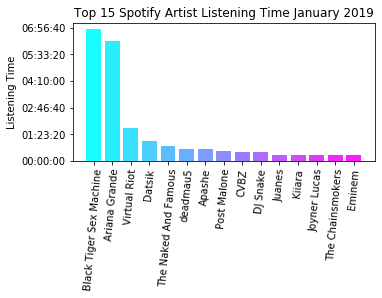

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import operator
import time
import numpy as np

fig, ax = plt.subplots()
y_pos = np.arange(N)
plt.bar(y_pos, list_dfs_month[0].secPlayed[:N], align='center', alpha=0.9, color=colors)
plt.xticks(y_pos, list_dfs_month[0].artistName[:N], rotation = 85)
formatter = matplotlib.ticker.FuncFormatter(lambda sec, y: time.strftime('%H:%M:%S', time.gmtime(sec)))
ax.yaxis.set_major_formatter(formatter)
plt.gcf().subplots_adjust(bottom=0.4, left=0.2)
plt.title("Top " + '15' + " Spotify Artist Listening Time " + 'January' + " 2019")
plt.ylabel('Listening Time')

plt.show()

_Voila_ , we have our first graph. Now let's make this generalizable so that we can produce graphs for each month.

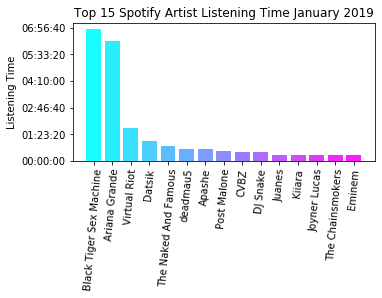

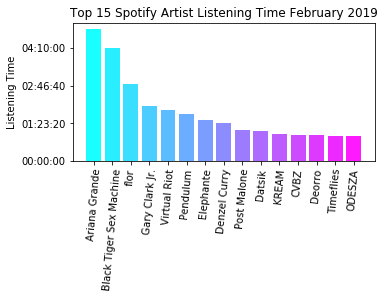

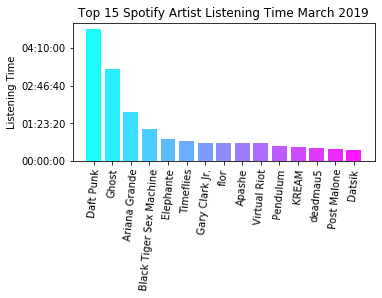

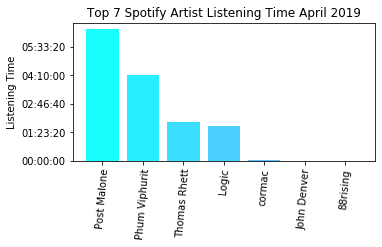

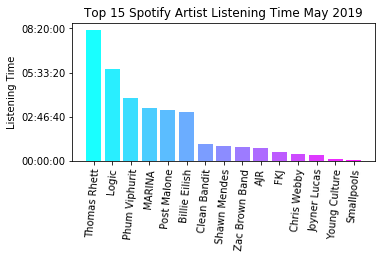

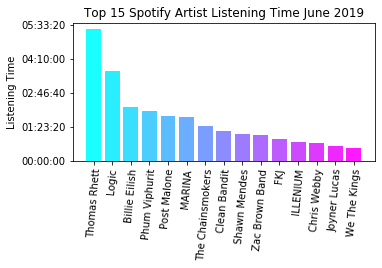

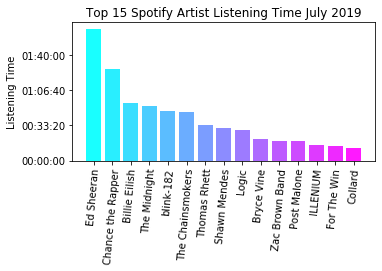

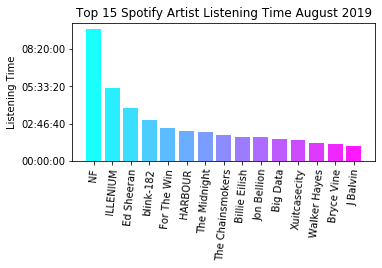

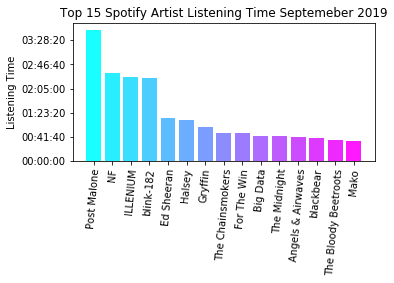

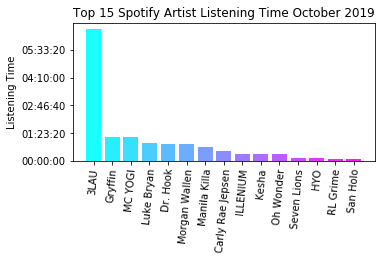

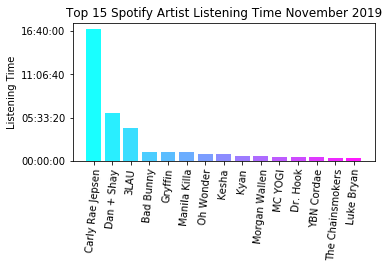

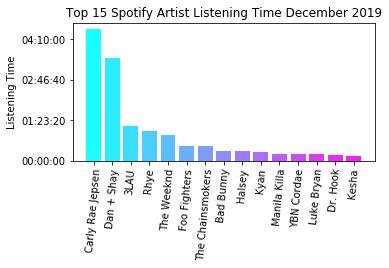

In [9]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'Septemeber', 'October', 'November', 'December']

for i in range(12):
    n = min(list_dfs_month[i].shape[0], N)

    fig, ax = plt.subplots()
    y_pos = np.arange(n)
    plt.bar(y_pos, list_dfs_month[i].secPlayed[:n], align='center', alpha=0.9, color=colors)
    plt.xticks(y_pos, list_dfs_month[i].artistName[:n], rotation = 85)
    formatter = matplotlib.ticker.FuncFormatter(lambda sec, y: time.strftime('%H:%M:%S', time.gmtime(sec)))
    ax.yaxis.set_major_formatter(formatter)
    plt.gcf().subplots_adjust(bottom=0.4, left=0.2)
    plt.title("Top " + str(n) + " Spotify Artist Listening Time " + months[i] + " 2019")
    plt.ylabel('Listening Time')

    plt.show()

The last graph I want to make is to display the top artist from each month

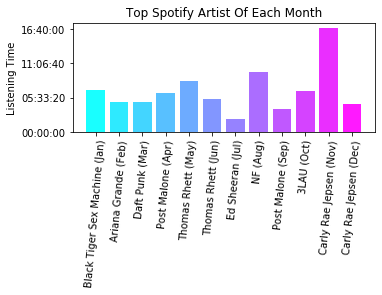

In [10]:
top_artist_by_month = []
time_played_by_month = []
for i in range(len(list_dfs_month)):
    top_artist_by_month.append(list_dfs_month[i].iloc[0].artistName + " (" + str(months[i][0:3]) + ")")
    time_played_by_month.append(list_dfs_month[i].iloc[0].secPlayed)

cmap = cm.get_cmap('cool', 12)
colors = []
for j in range(cmap.N):
    colors.append(cmap(j))

fig, ax = plt.subplots()
y_pos = np.arange(12)
plt.bar(y_pos, time_played_by_month, align='center', alpha=0.9, color=colors)
plt.xticks(y_pos, top_artist_by_month, rotation = 85)
formatter = matplotlib.ticker.FuncFormatter(lambda sec, y: time.strftime('%H:%M:%S', time.gmtime(sec)))
ax.yaxis.set_major_formatter(formatter)
plt.gcf().subplots_adjust(bottom=0.5, left=0.2)
plt.title("Top Spotify Artist Of Each Month")
plt.ylabel('Listening Time')

plt.show()

Key takeway, I __really, really, really, really, really, really__ like Carly Rae Jepsen.

_Yes that's a pun_